参考：https://learnku.com/docs/byte-of-python/2018<br>
《A Byte of Python》的中文译本，由社区维护，每年更新

### 第一个Python语句；

注意 print 总是以一个不可见的 「新的一行」 字符（\n）作为结尾，
除非给他指定一个end

In [117]:
print ("Hello World!")
print("Tom")
print ("Hello World!",end=' ')
print("Tom", end=' ')

Hello World!
Tom
Hello World! Tom 

超级计算器,超级大的数都没问题.

In [15]:
print(2**100)

1267650600228229401496703205376


In [13]:
2**100

1267650600228229401496703205376

不可变类型的每次赋值操作都生成一个新对象

In [22]:
a=5; print(id(a))
a=6; print(id(a))

4516730128
4516730160


元组不能够进行元素赋值

In [23]:
a=3,4,5
a[1]=6

TypeError: 'tuple' object does not support item assignment

可变类型可以改变，可以元素赋值；相同的变量可能指向同一个对象，在对象上的操作两个变量都可见。

In [25]:
l=[1,2,3]
m=l
print(l)
l[1]="hahahahaha"
print(l)
print(m)

[1, 2, 3]
[1, 'hahahahaha', 3]
[1, 'hahahahaha', 3]


###### Python在版本3.0以后对整数的大小不再进行限制，maxint没有了；但对list或str的索引下标仍有限制：sys.maxsize

In [27]:
import sys
print(sys.maxsize)
print(sys.maxint)

9223372036854775807


AttributeError: module 'sys' has no attribute 'maxint'

常用的数学函数如sqrt/sin/cos等都在math模块中

In [28]:
import math
print(math.sqrt(2))

1.4142135623730951


### 字符串

Python字符串不可修改，只能生成新的字符串

In [39]:
s='hello';
print(s)
print(id(s))
s += " world"
print(s)
print(id(s))
s[2]='x'

hello
140409685378992
hello world
140409682505264


TypeError: 'str' object does not support item assignment

用\[start:end:step\]的方式从字符串中提取一部分。

In [38]:
s='1234567'
print(s[1])
print(s[0:4])
print(s[-1:1:-1])

2
1234
76543


高级操作：split, join

In [41]:
print('You are my best friend'.split())
'-'.join(["One", "Two", "Three"])

['You', 'are', 'my', 'best', 'friend']


'One-Two-Three'

## 容器类型：列表和元组

In [47]:
s='abc'
l=list(s)
print(l, id(l))
l.reverse()
print(l, id(l))

['a', 'b', 'c'] 140409681583792
['c', 'b', 'a'] 140409681583792


## 单元素元组的表示

In [127]:
print((2)*4)
print((2,)*4)
print((2,3,4)*4)

8
(2, 2, 2, 2)
(2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4)


#### 集合的元素是不重复的，必须是可散列的

In [64]:
aset=set('abcd')
print(aset)
print('x' in aset)
print('a' in aset)
aset.add('d')
print(aset)
aset.add([1,2,3])

{'d', 'a', 'b', 'c'}
False
True
{'d', 'a', 'b', 'c'}


TypeError: unhashable type: 'list'

什么东西是hashable的?

In [47]:
print("hash(100) is {}".format(hash(100)))
print("hash('xzm') is {}".format(hash('xzm')))
print("hash((1,2,3)) is {}".format(hash((1,2,3))))

hash(100) is 100
hash('xzm') is -1971726307835518896
hash((1,2,3)) is 2528502973977326415


#### 字典的key也必须是可散列的

In [62]:
a={}
a[1]=23
a['xzm']=[1,2,3]
a[(1,2,3)]='PKU'
a[[1,2,3]]='PKU'

TypeError: unhashable type: 'list'

### 字符串的format()方法

In [72]:
age = 20
name = 'Swaroop'

print('{} was {} years old when he wrote this book'.format(name, age)) 
print('{0} was {1} years old when he wrote this book'.format(name, age)) 
print('Why is {0} playing with that python?'.format(name))
print('{author} write "{book}"'.format(author='Swaroop', book='a byte of python'))

Swaroop was 20 years old when he wrote this book
Swaroop was 20 years old when he wrote this book
Why is Swaroop playing with that python?
Swaroop write "a byte of python"
Swaroop is 20 years old


format()可读性优于字符串拼接的方式

In [ ]:
print(name + ' is ' + str(age) + ' years old')

#### format其他的排版功能

取十进制小数点后的精度为 3 ，得到的浮点数为 '0.333'

In [132]:
print('{0:.3f}'.format(1.0/3))

0.333


填充下划线 (_) ，文本居中
将 '___hello___' 的宽度扩充为 11 

In [131]:
print('{0:_^11}'.format('hello'))

___hello___


##### 对元组的format方式，使用‘%’的话，需要特别注意

In [129]:
name=(1,2,3)
print("hi there %s" % (name,))
print("hi there {}".format(name))
print("hi there %s" % name)

hi there (1, 2, 3)
hi there (1, 2, 3)


TypeError: not all arguments converted during string formatting

#### for-loop中else-block的作用

In [77]:
for i in range(10):
    print(i,end=' ')
    if i==15:
        break
else:
    print('fini')
    
for i in range(20):
    print(i,end=' ')
    if i==15:
        break
else:
    print('fini')   

0 1 2 3 4 5 6 7 8 9 fini
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

### Exception的处理

In [126]:
def execute(func):
    try:
        print('try...')
        func()
    except TypeError as e:
        print('TypeError:', e)
    except ZeroDivisionError as e:
        print('ZeroDivisionError:', e)
    else:
        print('no error!')
    finally:
        print('finally...')
    print('END')

def f1():
    23/0
execute(f1)

def f2():
    '.'.join([1,2])
execute(f2)

def f3():
    3+4
execute(f3)

def f4():
    l=[1,2]
    l[34]=0
execute(f4)

try...
ZeroDivisionError: division by zero
finally...
END
try...
TypeError: sequence item 0: expected str instance, int found
finally...
END
try...
no error!
finally...
END
try...
finally...


IndexError: list assignment index out of range

函数本身 vs. 函数返回值

In [4]:
def sum_list(alist):   #定义一个带参数的函数
    sum_tmp = 0
    for i in alist:
        sum_tmp += i
    return sum_tmp     #返回求和值

print(sum_list)
my_list = [23, 45, 67, 89, 100]
# 调用函数，将返回值赋值给 my_sum
my_sum = sum_list(my_list)
print("sum of my list is {}".format(my_sum))

<function sum_list at 0x7fc49950c3b0>
sum of my list is 324


没有return语句的函数返回None

In [1]:
def sayhello(name):
    print("How are you, {}!".format(name))
c=sayhello("Tom")
print(c)

How are you, Tom!
None


#### 缺省参数的使用

In [79]:
def func(a, b= 0, c= "abc"):
    print("{}:{}".format(c, a+b))
    
func(2)
func(2,4)
func(2,4, "shanghai")
func(2, c="beijing")
func(2, "guangzhou")

abc:2
abc:6
shanghai:6
beijing:2


TypeError: unsupported operand type(s) for +: 'int' and 'str'

##### Support for type hints
让代码更加可读、友好，但python runtime没管它，属于“君子协定”；第三方软件可能用到它。<br> 
参考：https://docs.python.org/3/library/typing.html<br>
     https://www.python.org/dev/peps/pep-0484/

In [5]:
def hello(name: int)-> str:
    for i in name:
        print(i)
    return 23

print(hello('xzm'))

from typing import List, Tuple

def top3(grades: List[Tuple[str, int]])->List[Tuple[str, int]]:
    grades.sort(reverse=True, key=lambda x:x[1])
    return grades[:3]

print(top3([("xzm", 4), ("abc", 7), ("ccc", 6), ("ddd", 10) ]))

SyntaxError: invalid syntax (<ipython-input-5-1a03ba2edc3a>, line 1)

##### Tuple assignment

In [184]:
a, b= 1, 2
a, b = b, a
print(a, b)
#########################
a, b = 1, 2
a = b
b = a
print(a, b)

2 1
2 2


## class的使用

In [4]:
class Force: #二维力
    def __init__(self, x, y):
        self.fx, self.fy = x, y
    def show(self):
        print("Force<{},{}>".format(self.fx, self.fy))
    def add(self, force2):
        x = self.fx + force2.fx
        y = self.fy + force2.fy
        return Force(x, y)
    """
    def __add__(self, other):
        print("__add__ is called")
        return self.add(other)
    """
    __add__ = add
    
    def __str__(self):
        print("__str__ is called")
        return "Force<{},{}>".format(self.fx, self.fy)
    
    def __mul__(self, n):
        print("__mul__ is called")
        x = self.fx * n
        y = self.fy * n
        return Force(x, y)
    def __eq__(self, other):
        print("__eq__ is called")
        return self.fx == other.fx and self.fy == other.fy

#调用特殊操作符__add__()
(Force(1,3)+Force(2,4)).show()
#调用特殊操作符__mul__()
(Force(1,3)*5).show()
#调用特殊操作符__str__()
print(Force(1,3))
#调用特殊操作符__eq__()
if Force(1,3)*5 == Force(5,15):
    print("equal!")

Force<3,7>
__mul__ is called
Force<5,15>
__str__ is called
Force<1,3>
__mul__ is called
__eq__ is called
equal!


Python中类的继承，父类与子类

In [11]:
#
#car.py
#
class Car:
    def __init__(self,name):
        self.name = name
        self.remain_mile = 0
    def fill_fuel(self, miles): #加燃料里程
        self.remain_mile += miles
    def run(self, miles):   #行驶miles里程
        print(self.name, end=":")
        if self.remain_mile >= miles:
            self.remain_mile -= miles
            print("run {} miles".format(miles))
        else:
            print("fuel out!")
class GasCar(Car):
    def fill_fuel(self,gas): #加汽油gas升
        print("加油{}升".format(gas))
        super().fill_fuel(gas * 6.0) #每升油跑6miles
class ElecCar(Car):
    def fill_fuel(self, power): #充电power度
        print("充电{}度".format(power))
        super().fill_fuel(power * 3.0) #每度电跑3miles
        
mycar = ElecCar("唐")
mycar.fill_fuel(5)
mycar.run(10)
mycar.run(10)

充电5度
唐:run 10 miles
唐:fuel out!


In [12]:
mycar = GasCar("悍马")
mycar.fill_fuel(4)
mycar.run(10)

加油4升
悍马:run 10 miles


使用自己实现的模块

In [118]:
import os
import sys
module_path = os.path.abspath(os.path.join('code'))
if module_path not in sys.path:
    sys.path.append(module_path)
import foo
import importlib
importlib.reload(foo)
foo.hello("小苹果")
print()

从其他地方import或者python foo.py，我都会执行
Hello! 小苹果, my name is foo
__main__


module是怎么定义的, \_\_name\_\_是模块的一个属性,被python直接运行时\_\_name\_\_=="__main__"
<br>被其他module import时，\_\_name\_\_就是模块名/文件名

In [119]:
# code/foo.py
def hello(yourname):
    print("Hello! {}, my name is {}".format(yourname, __name__))
    
print("从其他地方import或者python foo.py，我都会执行")

if __name__ == "__main__":
    hello("汤姆")

从其他地方import或者python foo.py，我都会执行
Hello! 汤姆, my name is __main__


### 算法分析

获取系统当前时间：从1970年一月一日零时开始的秒数

In [34]:
import time
help(time.time)
print(time.time())

Help on built-in function time in module time:

time(...)
    time() -> floating point number
    
    Return the current time in seconds since the Epoch.
    Fractions of a second may be present if the system clock provides them.

1616416298.138158


##### 求和并计时

In [86]:
import time
def sumofN2(n):
    start = time.time()     #记住开始时间
    theSum = 0
    #产生1，2，3，... n-1, n的序列
    for i in range(1, n+1):
        theSum += i
    end = time.time()       #记住结束时间
    return theSum, end-start

for i in range(200000,1000000,200000):
    print("Sum({}) is {}, requires {:.7f} seconds".format(i, *sumofN2(i)))
for i in range(2000000,10000000,2000000):
    print("Sum({}) is {}, requires {:.7f} seconds".format(i, *sumofN2(i)))

Sum(200000) is 20000100000, requires 0.0152571 seconds
Sum(400000) is 80000200000, requires 0.0527861 seconds
Sum(600000) is 180000300000, requires 0.0701230 seconds
Sum(800000) is 320000400000, requires 0.1179783 seconds
Sum(2000000) is 2000001000000, requires 0.2986081 seconds
Sum(4000000) is 8000002000000, requires 0.3139570 seconds
Sum(6000000) is 18000003000000, requires 0.5448189 seconds
Sum(8000000) is 32000004000000, requires 0.6989303 seconds


测试in操作的时间

In [87]:
import timeit
import random
print("size,   list_time,  dict_time")
for i in range(10000, 1000001,20000):   #从一万到一百万
    t = timeit.Timer("random.randrange({}) in x".format(i),
                    "from __main__ import random, x")
    x = list(range(i))
    lst_time = t.timeit(number=1000)
    x = {j:None for j in range(i)}
    d_time = t.timeit(number=1000)
    print("{}, {:.7f}, {:.7f} ".format(i, lst_time, d_time))

size,   list_time,  dict_time
10000, 0.0952176, 0.0021524 
30000, 0.2973295, 0.0009963 
50000, 0.2879717, 0.0019981 
70000, 0.5232345, 0.0013411 
90000, 0.6565097, 0.0014770 
110000, 0.7101817, 0.0013085 
130000, 0.8152176, 0.0011520 
150000, 1.0522239, 0.0023454 
170000, 1.0038803, 0.0012637 
190000, 1.0748739, 0.0011047 
210000, 1.2348756, 0.0010958 
230000, 1.2560319, 0.0014168 
250000, 1.4015310, 0.0010680 
270000, 1.5057958, 0.0012463 
290000, 1.5882087, 0.0012284 
310000, 1.7156450, 0.0011736 
330000, 1.9552789, 0.0011685 
350000, 1.9030939, 0.0011940 
370000, 2.3852037, 0.0018765 
390000, 2.5290653, 0.0011235 
410000, 2.6676698, 0.0016191 
430000, 2.6556337, 0.0011496 
450000, 2.8090001, 0.0011691 
470000, 2.7928352, 0.0011595 
490000, 2.8657406, 0.0012505 
510000, 2.9995242, 0.0013968 
530000, 2.9329648, 0.0014240 
550000, 3.0528602, 0.0013941 
570000, 3.1679072, 0.0014796 
590000, 3.6167360, 0.0014660 
610000, 3.7623898, 0.0014940 
630000, 3.5099761, 0.0016293 
650000, 3.51380

#### 通过特殊函数实现对int()的支持

In [128]:
class Uncle:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __int__(self):
        return self.age
 
print(int(Uncle("John", 48)))

48


##### 数学画图模块的使用

please input a number: 12


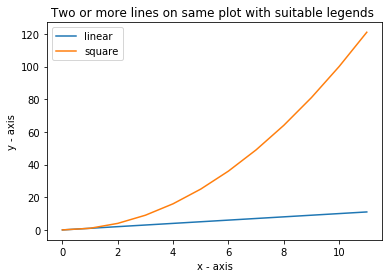

In [76]:
import matplotlib.pyplot as plt
number = int(input("please input a number:"))
plt.plot(range(number),range(number), label="linear")
plt.plot(range(number),[x*x for x in range(number)], label="square")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()
plt.show()

##### 测试列表index()操作和[]操作的时间复杂度

Please input 3 numbers(start, end, stop): 10000 100000 10000


10000 100000 10000
0.07126722599787172 0.0009275630000047386 0.0009464619943173602
0.11668385298980866 0.0009167959942715243 0.0008755739982007071
0.20366637599363457 0.0008599189895903692 0.0008398189966101199
0.2589222079986939 0.0009237269987352192 0.0008936880039982498
0.4217259360011667 0.0013623419945361093 0.0012647719995584339
0.3999706929898821 0.0009236300102202222 0.0008016999927349389
0.6789735640049912 0.000988532992778346 0.0009287770080845803
0.6949669730092864 0.0010521380027057603 0.000879844999872148
0.7005177410028409 0.0016928330005612224 0.0017376610048813745


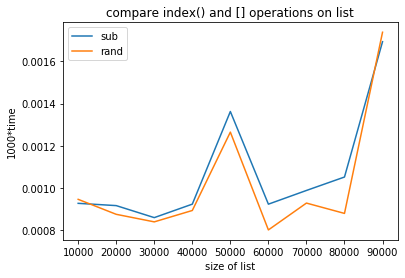

In [127]:
import timeit
import random
start, end, step = (int(x) for x in input("Please input 3 numbers(start, end, stop):").split(maxsplit=3))
print(start, end, step)
index_time = []
sub_time = []
rand_time = []
for N in range(start, end, step):
    t_index = timeit.Timer("mylist.index(random.randrange({}))".format(N)
                          , "import random; from __main__ import mylist")
    t_sub = timeit.Timer("mylist[random.randrange({})]".format(N)
                      , "import random; from __main__ import mylist")
    t_rand = timeit.Timer("random.randrange({})".format(N)
                         , "import random")
    mylist = list(range(N))
    t1 = t_index.timeit(number=1000)
    t2 = t_sub.timeit(number=1000)
    t3 = t_rand.timeit(number=1000)
    print(t1, t2, t3)
    index_time.append(t1)
    sub_time.append(t2)
    rand_time.append(t3)

import matplotlib.pyplot as plt
#plt.plot(range(start, end, step), index_time, label="index")
plt.plot(range(start, end, step), sub_time, label="sub")
plt.plot(range(start, end, step), rand_time, label="rand")
plt.xlabel('size of list')
plt.ylabel('1000*time')
plt.title('compare index() and [] operations on list')
plt.legend()
plt.show()

当N较小的时候，目标操作的执行时间较小，测量更加容易受到其他因素的干扰；<br>
sub和rand操作用时较少，也容易收到干扰

#### 讨论比特币挖矿中的算法复杂度问题

In [124]:
import hashlib
def bthash(unicode):
    return hashlib.sha256(unicode.encode("utf8")).hexdigest()

hash_result = bthash("""戏剧中叔父克劳迪谋害了丹麦国王--哈姆雷特的父亲，篡了王位，并娶了国王的遗孀葛簇特；
王子哈姆雷特因此为父王之死向叔父复仇。剧本细致入微地刻画了伪装的、真实的疯癫 —— 
从悲痛欲绝到假装愤怒 —— 探索了背叛、复仇、乱伦、堕落等主题""")
print("hash of《哈姆雷特介绍》：{}".format(hash_result))

difficulty_bits = 4
difficulty = 2 ** difficulty_bits
target = 2 ** (256 - difficulty_bits)
print("Difficulty is {}({} bits),\nless than:{:>64x}".format(
    difficulty, difficulty_bits, target))
#
# 核心问题，求解nonce，满足条件： 
#     Curr_hash = hash(transactions + nonce + Prev_hash) < target
#
def validate(transactions, nonce):
    block = transactions + [nonce] + ["前一个块哈希:13b1b06...76d3d"]
    hash_result = bthash(str(block))
    print("nonce {:>3}:{}".format(nonce, hash_result))
    if int(hash_result, 16) < target:
        return True
    else :
        return False
    
def find_nonce(transactions):               #挖矿过程
    ntries = 256
    for nonce in range(ntries):             #随机数
        if validate(transactions, nonce):
            print("A new block mined with nonce {}".format(nonce))
            return nonce
    else:
        print("Failed in ntries:{}".format(ntries))
        return None

if __name__ == "__main__":
    transactions = ["Alice sends .5 coins to Bob",
             "Bob sends 2 coins to John",
             "Alice send .1 coins to Kate",
             "John send 1 coins to Miselle",
             "Miselle send 2 coins to Alice",
               "矿工(光头强)被奖励一个coin"]
    nonce = find_nonce(transactions)
    if nonce:
        print("光头强成功开采出了一个区块，获得一个比特币奖励。")


hash of《哈姆雷特介绍》：34f9a09165f287df63d5db4f681faefdfa23ededbd414aff926f79f6c6476d3d
Difficulty is 16(4 bits),
less than:1000000000000000000000000000000000000000000000000000000000000000
nonce   0:67deb1faa9cc9868320e32adb507e388475ee994198df7c6750f980f96c94b55
nonce   1:c5d7746def2b0751168c570680c4c19dad938ecf6f94f3dd268e9c9fea7093e9
nonce   2:3c21180c9ca5cfa459bfba678939398d870092c88791f696035c60c05f5fcd12
nonce   3:9ddddea5eaa44cade98f6c8a1fcb4115b980462925b83f0c2abe2259691f2196
nonce   4:31107c457f9ecded6c6139dea78c8bdab10173eebf5bd373f7e7a7bed8eb0c89
nonce   5:a5e3b8e515b30f24773767bc280edc2f26e79f4d56913b8061442bab53f83d7a
nonce   6:1fdfea56f68a2cb45b8f2a8f983caeb765bbcef14cbbc608c0b021e8e6e655b7
nonce   7:e844f8cee21d46054b699bbaf39c5885f94755e7aaac1f78e4f6f11b0664d8d3
nonce   8:008a037f2005ed959aeb04f9268170c0fdca27fb2e703afb48acadf56b70148c
A new block mined with nonce 8
光头强成功开采出了一个区块，获得一个比特币奖励。


##### 最新的比特币区块：https://btc.com/
##### 比特币挖矿难度变更趋势：https://btc.com/stats/diff
其中的难度和难度对数，分别对应上面代码中的difficulty和difficulty_bits
当difficulty_bits最大取256时，difficulty数超过已知宇宙中的原子数，远远超过佛教中的“恒河沙数”。
##### 比特币价格变化趋势：https://www.coindesk.com/price/bitcoin
##### SHA256函数的更多信息：https://en.wikipedia.org/wiki/SHA-2
##### 思考
1：上面validate和find_nonce的复杂度分别是多少？它们是什么关系？分别属于NP还是P？<br>
2: 如果想把“Alice send .1 coins to Kate”改成“Alice send 100 coins to Kate”，计算一个新nonce来保持“块哈希”值不变，算法复杂度是多少？

In [120]:
l=[1,2,3]
r=['xzm', 'aa', 'bb']
[x for x in zip(l,r)]

[(1, 'xzm'), (2, 'aa'), (3, 'bb')]

### 线性表

#### Python list类型是顺序表，存储的实际是指针

In [40]:
mylist = [1, 2, 45, 45]
print([id(i) for i in mylist])
mylist.insert(2, 5)
print(mylist)
print([id(i) for i in mylist])

[4445832336, 4445832368, 4445833744, 4445833744]
[1, 2, 5, 45, 45]
[4445832336, 4445832368, 4445832464, 4445833744, 4445833744]


<img src="images/mylistPic.png" width="250" height="350" style="float:left">

##### 用Python list来实现stack ADT，实现后的stack是一个数据类型
通常在限制少的数据类型上加一些限制，来实现限制多的数据类型

In [129]:
#成员的方式实现
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[-1]
    def size(self):
        return len(self.items)
    def __str__(self):
       return "[ {} *".format(", ".join([str(i) for i in self.items]))

In [130]:
s = Stack()
print(s.isEmpty())

True


In [131]:
s.push(4)
s.push("Dog")
print(s)
print(s.peek())

[ 4, Dog *
Dog


In [87]:
s.push(True)
print(s.size())
print(s.isEmpty())

3
False


In [88]:
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())
print(s)

8.4
True
2
[ 4, Dog >


In [185]:
### 继承list的方式实现stack
class stack(list):
    def isEmpty(self):
        return self==[]
    def push(self, item):
        self.append(item)
    #def pop(self):
    #   return super().pop()
    #此处省略完整实现...
ss = stack()
print(ss.isEmpty())
ss.push("xzm")
print(ss.pop())

True
xzm


In [145]:
#括号匹配
def parChecker(symbolString):
    s = Stack()
    for c in symbolString:
        if c=='(':
            s.push(c)
        else : # 输入的字符，不是'('，就当成')'了
            if s.isEmpty():
                return False
            else:
                s.pop()
    else:
        return s.isEmpty()
print(parChecker("((()))"))
print(parChecker("(()"))
print(parChecker("())"))

True
False
False


In [109]:
#多种括号匹配(),[],{}
pars={'(':')','[':']','{':'}'}
def parChecker(symbolString):
    s = Stack()
    for c in symbolString:
        if c in pars:
            s.push(c)
        else : 
            if s.isEmpty():
                return False
            elif pars[s.peek()] == c:
                s.pop()
            else:
                return False
    else:
        return s.isEmpty()
print(parChecker("([{}])"))
print(parChecker("([{}]a)"))

[ ( *
[ (, [ *
[ (, [, { *
[ (, [ *
[ ( *
[  *
True
[ ( *
[ (, [ *
[ (, [, { *
[ (, [ *
[ ( *
False


In [150]:
#中缀转后缀代码
prec = {"*":3,
        "/":3,
        "+":2,
        "-":2}
def infixToPostfix(infixexpr):
    opStack = Stack()
    postfixList = []
    tokenList = infixexpr.split()
    for token in tokenList:
        if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" \
          or token in "0123456789":  #操作数的处理
            postfixList.append(token)
        elif token == '(':           #标记子表达式开始
            opStack.push(token)
        elif token == ')':           #子表达式结束
            while opStack.peek() != '(':
                postfixList.append(opStack.pop())
            else:
                opStack.pop()        #弹出'('
        else:                        #操作符
            while (not opStack.isEmpty() 
                   and opStack.peek() != '('
                   and prec[opStack.peek()] >= prec[token]):
                postfixList.append(opStack.pop())
            opStack.push(token)     #所有操作符都必须进栈等待
    while not opStack.isEmpty():
        postfixList.append(opStack.pop())
    return " ".join(postfixList)

print(infixToPostfix("A + B * 5"))
print(infixToPostfix("( A + B ) * 5"))

A B 5 * +
A B + 5 *


In [144]:
class ListNode:
     def __init__(self, val=0, next=None):
         self.val = val
         self.next = next
            
def next(l):
    return l.next, l.val

l1=ListNode(20)
l1, num = next(l1)
print(l1, num)


None 20


比较“==”与“=”的优先级

In [152]:
f = 4==5
print(f)

False


特殊函数的调用，不会出现多重歧义。

In [157]:
class foo:
    def __init__(self, num):
        self.num = num
    def __int__(self):
        return self.num
    #def __str__(self):
    #   return "hello"
    
b = foo(24)
print(b)

#### Python list实现Queue

In [193]:
class Queue_on_list:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def enqueue(self, item):
        self.items.insert(0, item) #0为队尾
    def dequeue(self):
        return self.items.pop()
    def size(self):
        return len(self.items)

In [216]:
Queue = Queue_on_list
def hotPotato(namelist, num):
    que =Queue()
    for name in namelist:
        que.enqueue(name)
    while que.size() > 1:
        for i in range(num):
            que.enqueue(que.dequeue())
        que.dequeue()  #杀掉一个
    return que.dequeue()
        
print(hotPotato(["Bill","David", "Susan", "Jane", "Kent", "Brad"],7))

Susan


##### 打印任务问题

In [379]:
import random
class Task:
    def __init__(self, time):
        self.arrive_time = time
        self.pages = random.randrange(1,21)
    def waitTime(self, current_time):
        return current_time - self.arrive_time
    
Queue = Queue_on_list

class Printer:
    def __init__(self,ppm):
        self.pagerate = ppm    #打印速度，每分钟几页
        self.currentTask = None 
        self.timeRemaining = 0 #任务倒计时
    def tick(self):
        if self.currentTask != None:
            self.timeRemaining -= 1
            if self.timeRemaining <= 0:
                self.currentTask = None
    def busy(self):
        return self.currentTask != None
    def startNext(self, newtask):
        self.currentTask = newtask
        self.timeRemaining = newtask.pages * 60 / self.pagerate

def newPrintTask():
    num = random.randrange(1,181)
    return num == 180

def simulation(numSeconds, pagesPerMinute):
    labprinter = Printer(pagesPerMinute)
    printQueue = Queue()
    waitingtimes = []
    for currentSecond in range(numSeconds):
        if newPrintTask():
            printQueue.enqueue(Task(currentSecond))
        if (not labprinter.busy()) and \
           (not printQueue.isEmpty()):
            nexttask = printQueue.dequeue()
            waitingtimes.append(nexttask.waitTime(currentSecond))
            labprinter.startNext(nexttask)
        labprinter.tick()
    #模拟结束，统计结果
    averageWait = sum(waitingtimes)/len(waitingtimes)
    print("Average Wait {:.3f} secs {} tasks remaining.".format(
        averageWait, printQueue.size()))

for i in range(10):
    simulation(7200,10)

Average Wait 10.056 secs 0 tasks remaining.
Average Wait 15.341 secs 0 tasks remaining.
Average Wait 19.727 secs 0 tasks remaining.
Average Wait 0.852 secs 0 tasks remaining.
Average Wait 15.367 secs 0 tasks remaining.
Average Wait 39.648 secs 1 tasks remaining.
Average Wait 16.306 secs 0 tasks remaining.
Average Wait 19.816 secs 0 tasks remaining.
Average Wait 21.730 secs 0 tasks remaining.
Average Wait 47.487 secs 0 tasks remaining.


#### Python list实现Deque

In [361]:
class Deque_on_list:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def addFront(self, item):
        self.items.append(item)
    def addRear(self, item):   # 0位置当尾巴
        self.items.insert(0, item)
    def removeFront(self):
        return self.items.pop()
    def removeRear(self):
        return self.items.pop(0)
    def size(self):
        return len(self.items)

“回文词”判定

In [365]:
Deque = Deque_on_list

def isPalindromic(str):
    dq = Deque()
    for c in str:
        dq.addFront(c)
    while dq.size()>1:
        if dq.removeFront() != dq.removeRear():
            return False
    else:
        return True

print("lasdsal is {}palindromic".format("" if isPalindromic("lasdsal") else "NOT "))
print("lasdsalaaa is {}palindromic".format("" if isPalindromic("lasdsalaaa") else "NOT "))

lasdsal is palindromic
lasdsalaaa is NOT palindromic


#### 链表的实现

In [369]:
class Node:
    def __init__(self, initdata=None):
        self.data = initdata
        self.next = None
    def getData(self):
        return self.data
    def getNext(self):
        return self.next
    def setData(self, newdata):
        self.data = newdata
    def setNext(self, newnext):
        self.next = newnext
        
temp = Node(93)
print(temp.getData())

class UnorderedList:
    def __init__(self):
        self.head = None
    def add(self, item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp

class UnorderedListWithNulHead:
    def __init__(self):
        self.head = Node()

93


In [376]:
class Student:
    def __init__(self, name, grade):
        self.name = name
        self.grade = grade
    def __lt__(self, other):
        return self.grade > other.grade
    def __str__(self):
        return "({},{})".format(self.name, self.grade)
    __repr__ = __str__

s = []
s.append(Student("Jack", 80))
s.append(Student("Cook", 90))
s.sort()
print(s)
s.sort(key=lambda x:x.name, reverse=True)
print(s)

[(Cook,90), (Jack,80)]
[(Jack,80), (Cook,90)]


##### 双链表的append和remove
小心判断边界条件和保持不变量

In [3]:
class DNode:
    def __init__(self, initdata=None):
        self.data = initdata
        self.next = None
        self.prev = None

class UnorderedList:
    def __init__(self):
        self.head = self.tail = None
    def __str__(self):
        ds, cur = [], self.head
        while cur != None:
            ds.append(cur.data)
            cur = cur.next
        return "{}".format(ds)
    def append(self, data):
        temp = DNode(data)
        if self.head == None:                 #插入空表
            self.head = self.tail = temp
        else:
            self.tail.next = temp             #从表尾插入
            temp.prev = self.tail
            self.tail = temp
    def remove(self, data):
        curr = self.head
        while curr != None:
            if curr.data == data:
                break
            curr = curr.next
        else:
            return                           #即使空表，也在这里返回
        #if self.tail == self.head:           #唯一元素  为什么这个地方要单独判断？
         #   self.tail = self.head = None
        if self.tail == curr:              #删尾
            self.tail = self.tail.prev               # ---> 看这里。
            self.tail.next = None
        elif self.head == curr:
            self.head = self.head.next
            self.head.next = None
        else:
            curr.prev.next = curr.next
            curr.next.prev = curr.prev
        return

dl = UnorderedList()
dl.append(1)
dl.append(2)
dl.append(3)
print(dl)
dl.remove(2); print(dl)
dl.remove(2); print(dl)
dl.remove(1); print(dl)
dl.remove(3); print(dl)

[1, 2, 3]
[1, 3]
[1, 3]
[3]
[3]


#### 海龟作图在Jupiter Notebook中不正常

In [1]:
import turtle
t = turtle.Turtle()
w = turtle.Screen()
t.forward(100)
w.exitonclick()

#### 递归法找硬币

In [37]:
def recMC(coinValueList, change):
    if change in coinValueList:
        return 1
    return 1+min([recMC(coinValueList, change-c) 
                for c in coinValueList if c <= change],default=change)

print(recMC([1,5,10,25], 63))

6


In [4]:
#### 递归法找硬币(带中间结果缓存)

In [39]:
def recMC(coinValueList, change, knownResults):
    if knownResults[change] > 0:
        return knownResults[change]
    elif change in coinValueList:
        knownResults[change] = 1
        return 1
    knownResults[change] = 1+min([recMC(coinValueList, change-c, knownResults) 
                for c in coinValueList if c <= change],default=change)
    return knownResults[change]

print(recMC([1,5,10,25], 63, [0]*64))

6


#### 动规找硬币

In [11]:
def dpMC(coinValueList, change, minCoins):
    for cents in range(change+1):
        # minCoins[less than cents] ==> minCoins[cents]
        minCoins[cents] = min([1+minCoins[cents-c]
             for c in coinValueList if c <= cents], default=cents)
    return minCoins[change]

print(dpMC([1,5,10,25], 63, [0]*64))

6


#### 动规找硬币（扩展）

In [17]:
def dpMC(coinValueList, change, minCoins, coinsUsed):
    for cents in range(change+1):
        # minCoins[less than cents] ==> minCoins[cents] 
        ll = [(1+minCoins[cents-c],c) for c in coinValueList if c <= cents]
        minCoins[cents], coinsUsed[cents] = min(ll, key=lambda x:x[0], default=(cents, 1))
    return minCoins[change]
def printCoins(coinsUsed, change):
    coin = change
    while coin > 0:
        thisCoin = coinsUsed[coin]
        print(thisCoin, end=' ')
        coin -= thisCoin
    print()
coinsUsed = [0]*64
print(dpMC([1,5,10,25], 63, [0]*64, coinsUsed))
printCoins(coinsUsed, 63)
print(dpMC([1,5,10,21, 25], 63, [0]*64, coinsUsed)) #增加了奇葩21
printCoins(coinsUsed, 63)

6
1 1 1 10 25 25 
3
21 21 21 


###### O(mn)的字符串查找算法

In [25]:
def indexOmn(S, P):
    i=0                     #P的读写头
    j=0                     #S的读写头
    while i<len(P) and j<len(S):
        if P[i] == S[j]:    #两个读写头下的字符相等
            i += 1
            j += 1
        else:               #不等
            j = j - i + 1   #把P右移一格，重新比较
            i = 0
    else:
        if i == len(P):     #找到了一个匹配
            return j-i
        else:
            return None

print(indexOmn("baababababacaca", "ababaca"))
print(indexOmn("baababababacaca", "ababaxa"))

6
None


##### 求Pattern所有前缀（包括自身）的最长公共前后缀

In [31]:
def partial(pattern):
    ret = [0,0]
    for i in range(1, len(pattern)):
        j = ret[i]
        while j > 0 and pattern[j] != pattern[i]:
            j = ret[j]
        ret.append(j+1 if pattern[j] == pattern[i] else 0)
    return ret

print(partial('ababac'))
print(partial('ababaca'))

[0, 0, 0, 1, 2, 3, 0]
[0, 0, 0, 1, 2, 3, 0, 1]


In [36]:
def indexKMP(S, P):
    i=0                     #P的读写头
    j=0                     #S的读写头
    part=partial(P)         #计算P的partial
    while i<len(P) and j<len(S):
        if P[i] == S[j]:    #两个读写头下的字符相等
            i += 1
            j += 1
        else:               #不等
            if i == 0:
                j += 1
            i = part[i]
    else:
        if i == len(P):     #找到了一个匹配
            return j-i
        else:
            return None

print(indexKMP("baababababacaca", "ababaca"))
print(indexKMP("baababababacaca", "ababaxa"))

6
None
